# ML supervisado con scikit-learn 
Este notebook contiene el código para el curos de "ML supervisado con scikit-learn". Las librerias que se han usado son

```
pandas==1.1.5
plotnine==0.8.0
scikit-learn==0.24.2
```

Los datos utilizados son de Tweets descargados durante unos dias en agosto. Se pueden descargar [aquí](DATA).

Generalmente se cargaran as librerias cuando se utilicen. Esto no es necesariamente la mejor practica en general, pero lo hacemos asi para que sea más claro de donde vienen ciertas funciones.

In [13]:
import pandas as pd
import plotnine as pn

data_location = 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500

In [2]:
tweet_data = pd.read_csv(data_location)

/home/andreas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweet_data.shape

(23057, 56)

In [6]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,202,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,1426598917471305735,1426598917471305735,1.628963e+12,2021-08-14 19:37:41,200,NaN,RT @peterdaou: An Italian town hit 124 degrees...,en,['climateemergency'],[],21447363,21447363,katyperry,KATY PERRY,6,19,https://twitter.com/katyperry/status/142659891...,[],[],0,NaN,True,0,0,407,0,None,NaN,NaN,NaN,1.846427e+07,"An Italian town hit 124 degrees, possibly the ...",1.426281e+18,[],2021-08-13 22:32:52 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
2,1425588921233133572,1425588921233133572,1.628722e+12,2021-08-12 00:44:19,200,NaN,Thank you @MTV @vmas! ⚔️💓 https://t.co/iyo2KW...,en,[],[],14230524,14230524,ladygaga,Lady Gaga,4,0,https://twitter.com/ladygaga/status/1425588921...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14255...,False,41136,1005,5156,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
3,1426896158958526466,1426896158958526466,1.629034e+12,2021-08-15 15:18:49,200,NaN,Me watching #FreeGuy for the 9th time in a row...,en,['freeguy'],[],19248106,19248106,MariahCarey,Mariah Carey,7,15,https://twitter.com/MariahCarey/status/1426896...,[],['https://pbs.twimg.com/tweet_video_thumb/E81a...,1,https://pbs.twimg.com/tweet_video_thumb/E81ae3...,False,12909,250,1042,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...
4,1426198521250734089,1426192006154539008,1.628867e+12,2021-08-13 17:06:39,200,NaN,https://t.co/Fjua6JytBh,und,[],[],19248106,19248106,MariahCarey,Mariah Carey,5,17,https://twitter.com/MariahCarey/status/1426198...,['http://youtu.be/qq09UkPRdFY'],[],0,NaN,False,1416,57,248,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...


No es necesario hacer una gran introducción a los datos ya que no es nuestro foco, pero para resumir:

* Tenemos X Tweets de unas cuentas famosas de Twitter
* Las variables son informacion estandar que nos facilita Twitter
* También incluimos información sobre las cuentas en si, también con datos facilitados por el API de Twitter

## Entrenando el primer modelo
Entrenamos unas regresiones sencillas para mostrar el sintaxis. Cogemos un par de variables y el numero de "likes" del Tweet como el target. Nota que no dividimos entre train y test.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X_variables = ['followers', 'video']
y_variable = 'nlikes'

In [11]:
model = LinearRegression()
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_lin_reg'] = model.predict(tweet_data[X_variables])

In [12]:
model = DecisionTreeRegressor(random_state=0)
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_dt_reg'] = model.predict(tweet_data[X_variables])

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 256 rows containing missing values.


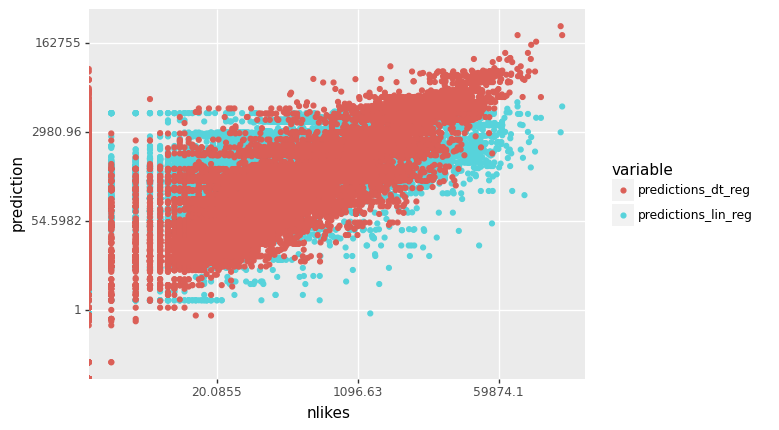

In [19]:
# Creamos un grafico simple para visualizar
columns = [y_variable, 'predictions_lin_reg', 'predictions_dt_reg']
graph_data = pd.melt(tweet_data[columns], y_variable)
graph = (
    pn.ggplot(graph_data, pn.aes(x='nlikes', y='value', color='variable')) 
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
    + pn.ylab('prediction')

)

graph.draw();

## Los requisitos minimos para los datos
Ahora mostramos cómo sacamos nuestro "X" y "y" de los datos crudos.

In [20]:
X = tweet_data[X_variables]
y = tweet_data[y_variable]

In [21]:
X.head()

,followers,video
0,20854298,0
1,108819032,0
2,83675119,1
3,21612341,1
4,21612341,0


In [22]:
y.head()

0        0
1        0
2    41136
3    12909
4     1416
Name: nlikes, dtype: int64

In [26]:
model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

array([ 1976.87217029, 10400.51167112,  8472.12296373,  2528.89498453,
        2049.4635449 ,  2528.89498453,  2528.89498453,  8498.03048569,
        8018.59904606, 10889.71272264])

Qué pasa si incluimos datos de texto o diferentes números de filas?

In [27]:
# Incluyendo datos de texto
X_variables = ['language', 'name']

X = tweet_data[X_variables]
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: could not convert string to float: 'en'

In [28]:
X_variables = ['followers', 'video']

# Ahora cogemos solo 2000 filas para el X
X = tweet_data[X_variables].sample(2000, random_state=0)
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: Found input variables with inconsistent numbers of samples: [2000, 23057]

## Ejemplos de pasos previos
Vamos a mostrar algunos pasos previos para dar contexto sobre la preparación de los datos.

In [29]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,202,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...,1976.872170,0.000000
1,1426598917471305735,1426598917471305735,1.628963e+12,2021-08-14 19:37:41,200,NaN,RT @peterdaou: An Italian town hit 124 degrees...,en,['climateemergency'],[],21447363,21447363,katyperry,KATY PERRY,6,19,https://twitter.com/katyperry/status/142659891...,[],[],0,NaN,True,0,0,407,0,None,NaN,NaN,NaN,1.846427e+07,"An Italian town hit 124 degrees, possibly the ...",1.426281e+18,[],2021-08-13 22:32:52 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...,10400.511671,0.000000
2,1425588921233133572,1425588921233133572,1.628722e+12,2021-08-12 00:44:19,200,NaN,Thank you @MTV @vmas! ⚔️💓 https://t.co/iyo2KW...,en,[],[],14230524,14230524,ladygaga,Lady Gaga,4,0,https://twitter.com/ladygaga/status/1425588921...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14255...,False,41136,1005,5156,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...,8472.122964,41136.000000
3,1426896158958526466,1426896158958526466,1.629034e+12,2021-08-15 15:18:49,200,NaN,Me watching #FreeGuy for the 9th time in a row...,en,['freeguy'],[],19248106,19248106,MariahCarey,Mariah Carey,7,15,https://twitter.com/MariahCarey/status/1426896...,[],['https://pbs.twimg.com/tweet_video_thumb/E81a...,1,https://pbs.twimg.com/tweet_video_thumb/E81ae3...,False,12909,250,1042,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...,2528.894985,24613.333333
4,1426198521250734089,1426192006154539008,1.628867e+12,2021-08-13 17:06:39,200,NaN,https://t.co/Fjua6JytBh,und,[],[],19248106,19248106,MariahCarey,Mariah Carey,5,17,https://twitter.com/MariahCarey/status/1426198...,['http://youtu.be/qq09UkPRdFY'],[],0,NaN,False,1416,57,248,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/13

In [34]:
# Remplezamos un valor
tweet_data.quote_url.replace('0', '')

0         
1         
2         
3         
4         
        ..
23052     
23053     
23054     
23055     
23056     
Name: quote_url, Length: 23057, dtype: object

In [35]:
# Remplezamos nulos
tweet_data.location.fillna('UNKNOWN')

0                        Washington, DC
1                               UNKNOWN
2                               UNKNOWN
3        Citizen of the World Dahhhling
4        Citizen of the World Dahhhling
                      ...              
23052                                UK
23053                                UK
23054                                UK
23055                                UK
23056                                UK
Name: location, Length: 23057, dtype: object

In [36]:
# Creamos un feature
tweet_data['is_english'] = tweet_data.language == 'en'
tweet_data.is_english.value_counts()

True     17916
False     5141
Name: is_english, dtype: int64

In [37]:
# Convertimos a numerico
pd.get_dummies(tweet_data['language'])

,ar,ca,cs,cy,da,de,en,es,et,eu,fa,fi,fr,hi,ht,hu,in,is,it,iw,ja,ko,lt,lv,mr,nl,no,pl,pt,ro,ru,sv,ta,tl,tr,und,ur,zh
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23052,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23053,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23054,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23055,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dividimos los datos
Tenemos varias maneras para dividir los datos, pero cuando queremos que sea random, sklearn es mejor que Pandas.

In [40]:
from sklearn.model_selection import train_test_split

In [55]:
# Con Pandas es un poco raro!
train = tweet_data.sample(frac=0.7, random_state=0)
test = tweet_data[~tweet_data.id.isin(train.id)]
print(train.shape)
print(test.shape)

(16140, 59)
(6917, 59)


In [57]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
15554,1426230836366544899,1426230836366544899,1.628875e+12,2021-08-13 19:15:04,200,NaN,Take Five: Interest rate lift-off ahead https...,en,[],[],1652541,1652541,Reuters,Reuters,5,19,https://twitter.com/Reuters/status/14262308363...,['http://reut.rs/3AENLyz'],['https://pbs.twimg.com/media/E8r9YzRWQAoXcFN....,1,https://pbs.twimg.com/media/E8r9YzRWQAoXcFN.jpg,False,29,2,5,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1652541,Reuters,Reuters,"Top and breaking news, pictures and videos fro...",http://t.co/BmHxhkm3Mh,2007-03-20 17:46:05 UTC,2007-03-20,17:46:05 UTC,730463,Around the world,1171,23658467,755,516329,False,True,https://pbs.twimg.com/profile_images/119475194...,https://pbs.twimg.com/profile_banners/1652541/...,2724.835187,131.205782,True
19199,1425819880595484683,1425819880595484683,1.628777e+12,2021-08-12 16:02:04,200,NaN,RT @topikanerva: for anyone who studied natura...,en,[],[],717313,717313,arstechnica,Ars Technica,4,16,https://twitter.com/arstechnica/status/1425819...,[],[],0,NaN,True,0,0,24,0,None,NaN,NaN,NaN,126097285.0,"for anyone who studied natural sciences, here ...",1.424596e+18,[],2021-08-09 07:00:05 CEST,NaN,NaN,NaN,717313,Ars Technica,arstechnica,"Original news, reviews, analysis of tech trend...",http://t.co/Ul1NPoX9hd,2007-01-28 01:58:49 UTC,2007-01-28,01:58:49 UTC,118653,NYC - Boston - Chicago - SF,1330,1147218,8425,6238,False,True,https://pbs.twimg.com/profile_images/221557673...,https://pbs.twimg.com/profile_banners/717313/1...,89.691593,18.560000,True


In [63]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)
print(train.shape)
print(test.shape)

(16139, 59)
(6918, 59)


In [64]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
19451,1426183171297759233,1426183171297759233,1.628864e+12,2021-08-13 16:05:39,200,NaN,RT @BBCJonSopel: The decision by @POTUS to pul...,en,['afghanistan'],[],742143,742143,BBCWorld,BBC News (World),5,16,https://twitter.com/BBCWorld/status/1426183171...,[],[],0,NaN,True,0,0,100,0,None,NaN,NaN,NaN,130104942.0,The decision by @POTUS to pull troops from #Af...,1.426182e+18,[],2021-08-13 16:02:18 CEST,NaN,NaN,NaN,742143,BBC News (World),BBCWorld,"News, features and analysis from the World's n...",https://t.co/7NEgoMwJy3,2007-02-01 07:44:29 UTC,2007-02-01,07:44:29 UTC,332018,"London, UK",18,32526661,13,25403,False,True,https://pbs.twimg.com/profile_images/115071777...,https://pbs.twimg.com/profile_banners/742143/1...,3094.635774,482.939891,True
12302,1426778177792212994,1426778177792212994,1.629005e+12,2021-08-15 07:30:00,200,NaN,Repeating second grade: Kids being held back a...,en,[],[],1367531,1367531,FoxNews,Fox News,7,7,https://twitter.com/FoxNews/status/14267781777...,['https://www.foxnews.com/lifestyle/parents-ho...,[],0,NaN,False,142,71,46,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1367531,Fox News,FoxNews,"Follow America's #1 cable news network, delive...",http://t.co/ZYG58XZtAC,2007-03-17 19:01:26 UTC,2007-03-17,19:01:26 UTC,431779,U.S.A.,262,20147821,2,138272,False,True,https://pbs.twimg.com/profile_images/918480715...,https://pbs.twimg.com/profile_banners/1367531/...,1909.218836,414.288066,True


Fija bien en el `random_state`! Si repetimos el proceso tendremos resultados diferentes!

In [65]:
train.nlikes.describe()

count     16139.000000
mean       1158.515955
std        7128.280430
min           0.000000
25%           8.000000
50%          46.000000
75%         187.000000
max      362671.000000
Name: nlikes, dtype: float64

In [66]:
train, test = train_test_split(tweet_data, train_size=0.7)
print(train.shape)
print(test.shape)

(16139, 59)
(6918, 59)


In [67]:
train.nlikes.describe()

count     16139.000000
mean       1182.949625
std        7349.555210
min           0.000000
25%           8.000000
50%          46.000000
75%         196.000000
max      362671.000000
Name: nlikes, dtype: float64

Quizas queremos dividir en el tiempo, pero sin especificar una fecha exacta

In [62]:
train, test = train_test_split(tweet_data.sort_values('date'), train_size=0.7, random_state=0, shuffle=False)
print(train.shape, train.date.max())
print(test.shape, test.date.max())

(16139, 59) 2021-08-14 15:17:04
(6918, 59) 2021-08-16 00:00:00


## Pipelines
Creamos algo muy basico para mostrar cómo se utiliza - un pipeline de un único paso, entrar el modelo!

In [69]:
from sklearn.pipeline import Pipeline

In [71]:
X_variables = ['followers', 'video']
y_variable = 'nlikes'

linear_reg_pipeline = Pipeline(
    [
        ('linear_reg', LinearRegression())
    ]
)

linear_reg_pipeline.fit(tweet_data[X_variables], tweet_data[y_variable])
linear_reg_pipeline.predict(tweet_data[X_variables])[:10]

array([ 1976.87217029, 10400.51167112,  8472.12296373,  2528.89498453,
        2049.4635449 ,  2528.89498453,  2528.89498453,  8498.03048569,
        8018.59904606, 10889.71272264])

Podemos tambien acceder a los distintos pasos de nuestro pipeline

In [72]:
linear_reg_pipeline

Pipeline(steps=[('linear_reg', LinearRegression())])

In [73]:
linear_reg_pipeline['linear_reg']

LinearRegression()

## Funciones para la preparación de datos
Antes de incorporarlas en un pipeline, vamos a revisar algunas opciones que tenemos para la preparación de los datos.

Utilizaremos nuestro train y test de antes.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [126]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Primero aplicamos un "estandarización" que es muy útil para ciertos modelos (redes neurales, SVM...)

In [91]:
# Standarizamos los datos
variables = ['followers', 'following']

print('Como se distribuye nuestro train:')
print(train[variables].describe().round())
print('\n')
print('Como se distribuye nuestro test:')
print(test[variables].describe().round())
print('\n\n')

follower_scaler = preprocessing.StandardScaler()
follower_scaler.fit(train[variables])

print('Ahora el train se distribuye:')
print(pd.DataFrame(follower_scaler.transform(train[variables])).describe().round())
print('\n')
print('Ahora el test se distribuye:')
print(pd.DataFrame(follower_scaler.transform(test[variables])).describe().round())

Como se distribuye nuestro train:
         followers  following
count      16139.0    16139.0
mean    10781498.0    11577.0
std     12632757.0   170312.0
min          107.0        0.0
25%      3230802.0      422.0
50%      5552807.0      932.0
75%     16749405.0     1785.0
max    129909278.0  4200793.0


Como se distribuye nuestro test:
         followers  following
count       6918.0     6918.0
mean    10810575.0     8927.0
std     12754937.0   135326.0
min        20906.0        0.0
25%      3265097.0      422.0
50%      5468063.0      943.0
75%     16749405.0     1785.0
max    113927565.0  4200793.0



Ahora el train se distribuye:
             0        1
count  16139.0  16139.0
mean      -0.0      0.0
std        1.0      1.0
min       -1.0     -0.0
25%       -1.0     -0.0
50%       -0.0     -0.0
75%        0.0     -0.0
max        9.0     25.0


Ahora el test se distribuye:
            0       1
count  6918.0  6918.0
mean      0.0    -0.0
std       1.0     1.0
min      -1.0    -0.0
2

Notas:

* En el último paso, teniamos que convertir la salida de `transform` (un numpy array) a un data frame para aprovechar el `describe` de Pandas
* Hemos utilizado `round` despues del `describe` para simplificar la salida y poder ver mejor el resultado

Reto: Intenta hacer esto con Pandas! Hace falta sacar la media y STD de train y luego aplicar la formula para el estandarización en el test - no dificil pero facil de equivocarse!

Ahora intentamos remplazar unos nulos...

In [109]:
from sklearn.impute import SimpleImputer

In [116]:
variables = ['language', 'location']

location_replace = SimpleImputer(strategy='constant',fill_value='UNKNOWN')

location_replace.fit(train[variables])

location_replace.transform(train[variables])

array([['en', 'London, UK'],
       ['en', 'U.S.A.'],
       ['en', 'San Francisco/New York'],
       ...,
       ['en', 'UNKNOWN'],
       ['en', 'UNKNOWN'],
       ['en', 'West Newbury, MA']], dtype=object)

Nuestros datos no tienen tantos problemas de nulos entonces es dificil mostrar la útilidad. También nos permite replazar con el valor más común, la media, etc.

Existen muchas más funciones pero no tenemos tiempo para mirar todo (no seria útil de todas formas). Todos utilizan el mismo sintaxis de `fit` y `transform`.

Para todos las funciones que preparan los datos, tambien existe el meotodo `fit_transform` que nos permite hacer el `fit` y `transform` del train en un único paso - pero no vale para el test!

## Convertiendo columnas a númerico
Muchas veces tenemos que utilizar variables no númericas, pero nuestra condición basica para el entranamiento era tener todo númerico. Hay varias opciones, pero la más común es el `OneHotEncoder`...

In [101]:
# Standarizamos los datos
variables = ['language']

encoder = preprocessing.OneHotEncoder()
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
print(encoder.categories_)

[array(['ar', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'eu', 'fi',
       'fr', 'hi', 'ht', 'hu', 'in', 'is', 'it', 'iw', 'ja', 'ko', 'lt',
       'lv', 'mr', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sv', 'ta', 'tl',
       'tr', 'und', 'ur', 'zh'], dtype=object)]


Imagina que solo queremos considerar ingles y castellano...

In [106]:
# Standarizamos los datos
variables = ['language']
languages = ['en', 'es']

encoder = preprocessing.OneHotEncoder(categories=[languages], handle_unknown='ignore')
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
16134,1.0,0.0
16135,1.0,0.0
16136,1.0,0.0
16137,1.0,0.0


In [107]:
print(encoder.categories_)

[array(['en', 'es'], dtype=object)]


Vimos en Pandas que teniamos nuestro `get_dummies` - pero vamos que hacemos si existe un valor en test que no está en train? En scikit-learn no tenemos ningún problema...

## Construyendo un Pipeline más completo
Queremos ahora construir un modelo similar al de antes, pero ahora utilizando nuestras funciones. Lo único dificil es tratar las columnas que necesitan diferentes pasos...

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

/home/andreas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 998 rows containing missing values.


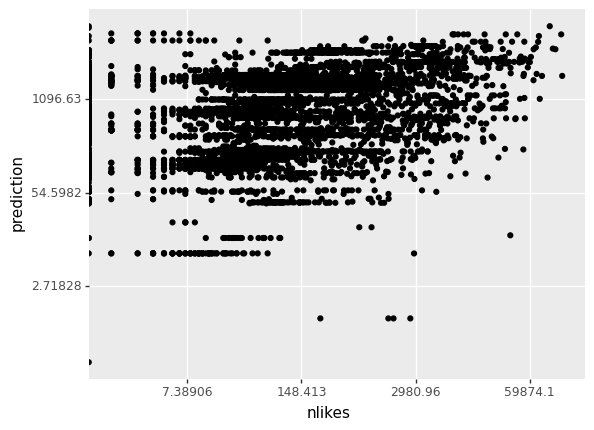

In [122]:
numeric_variables = ['following', 'followers']
numeric_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

categoric_variables = ['language']
languages = ['en', 'es']
categoric_pipeline = Pipeline(
    [
        ('encoder', OneHotEncoder(categories=[languages], handle_unknown='ignore'))
    ]
)

# Tenemos que juntar nuestros Pipelines aqui con un sintaxis similar al Pipeline normal
preprocessing = ColumnTransformer(
    [
        ('numeric', numeric_pipeline, numeric_variables),
        ('categorical', categoric_pipeline, categoric_variables)
    ]
)

full_pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('regression', LinearRegression())
    ]
)

X_variables = numeric_variables + categoric_variables
y_variable = 'nlikes'

full_pipeline.fit(train[X_variables], train[y_variable])

test['prediction'] = full_pipeline.predict(test[X_variables])

graph = (
    pn.ggplot(test, pn.aes(x='nlikes', y='prediction')) 
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

In [124]:
from sklearn import set_config

set_config(display='diagram')
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['following', 'followers']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[['en',
                                                                                              'es']],
                                                                                 handle_unknown='ignore'))]),
                                                  ['language'])])),
                ('regression', LinearRegression())])

In [123]:
train[X_variables]

,following,followers,language
19451,18,32526661,en
12302,262,20147821,en
11588,422,10255474,en
3509,1785,7881571,es
1126,10449,51402628,en
...,...,...,...
13123,13163,773404,en
19648,502,16749405,en
9845,175,2346732,en
10799,7,11678505,en


Hemos conseguido entranar nuestro modelo empezando con los datos que vemos arriba, que claramente no estan aptos para el modelo, pero gracias al `Pipeline` conseguimos hacer el proceso entero en un paso y sin tocar los datos de test!

## Los modelos disponibles
Ahora vamos a ir viendo los diferentes modelos que hay. Antes de todo - vamos a también crear un target de clasificación para mostrar los modelos de clasificación. Simplemente marcamos si un tweet tuvo más de 50 likes.

In [127]:
train['nlikes_50'] = train.nlikes > 50
test['nlikes_50'] = test.nlikes > 50

print(train.nlikes_50.mean(), test.nlikes_50.mean())

0.48367309003036124 0.4786065336802544


### GLM
Vamos a ver las regresiones lineales y logisticas

In [128]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X_variables = ['followers', 'video']
y_variable_reg = 'nlikes'
y_variable_class = 'nlikes_50'

In [133]:
reg_model = LinearRegression()
reg_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_lin_reg'] = reg_model.predict(test[X_variables])

In [137]:
log_model = LogisticRegression()
log_model.fit(train[X_variables], train[y_variable_class])
test['predictions_log_reg'] = log_model.predict(test[X_variables])

In [135]:
test[[y_variable_reg, 'predictions_lin_reg']]

,nlikes,predictions_lin_reg
0,29,2694.696111
1,0,117.939524
2,80,1730.958200
3,0,370.134067
4,1,35.568853
...,...,...
6913,66,701.074784
6914,21,328.980402
6915,25,909.861553
6916,29,335.698009


In [140]:
test[[y_variable_class, 'predictions_log_reg']]

,nlikes_50,predictions_log_reg
0,False,True
1,False,True
2,True,True
3,False,True
4,False,True
...,...,...
6913,True,True
6914,False,True
6915,False,True
6916,False,True


Muy similar todo hasta ahora - vamos a mirar las cosas especificas de los GLM

In [143]:
X_variables

['followers', 'video']

In [144]:
reg_model.coef_, reg_model.intercept_

(array([9.49632765e-05, 4.39014623e+02]), 8.995943715480735)

In [145]:
log_model.coef_, reg_model.intercept_

(array([[3.09156896e-08, 1.45362505e-15]]), 8.995943715480735)

Podemos entrar sin intercept si queremos...

In [147]:
reg_model = LinearRegression(fit_intercept=False)
reg_model.fit(train[X_variables], train[y_variable_reg]);

In [148]:
reg_model.coef_, reg_model.intercept_

(array([9.52406595e-05, 4.44132621e+02]), 0.0)

Y tambien hay muchos más hiperparametros con los cuales podemos jugar

Lo más especial de la regresion logistica es poder predecir una probabilidad...

In [150]:
probability = log_model.predict_proba(test[X_variables])

In [151]:
probability

array([[0.32488367, 0.67511633],
       [0.49113417, 0.50886583],
       [0.3634105 , 0.6365895 ],
       ...,
       [0.42720093, 0.57279907],
       [0.47343523, 0.52656477],
       [0.46700252, 0.53299748]])

In [153]:
test['predictions_log_reg_proba'] = probability[:, 1]

In [154]:
test[[y_variable_class, 'predictions_log_reg_proba']]

,nlikes_50,predictions_log_reg_proba
0,False,0.675116
1,False,0.508866
2,True,0.636590
3,False,0.529359
4,False,0.502163
...,...,...
6913,True,0.520585
6914,False,0.526020
6915,False,0.572799
6916,False,0.526565


In [156]:
test.groupby('nlikes_50')[['predictions_log_reg', 'predictions_log_reg_proba']].mean()

,predictions_log_reg,predictions_log_reg_proba
nlikes_50,,
False,True,0.552419
True,True,0.605946


So we can see that while the original prediction wasn't so useful, the probability for having over 50 likes is higher in the case where they actually do have over 50 likes, which is good!

### Near neighbours